# Monte Carlo Methods
Monte Carlo methods provide an analytical solution to complex processes. It uses repeated random sampling to predict the probabilities of specific outcomes in processes that have random variables and uncertainty. It runs thousands of simulations, providing a probability distribution of differing results. It is used in financial modelling for events that have uncertain outcome - such as the price movements of a stock, the value of an option, portfolio valuation.

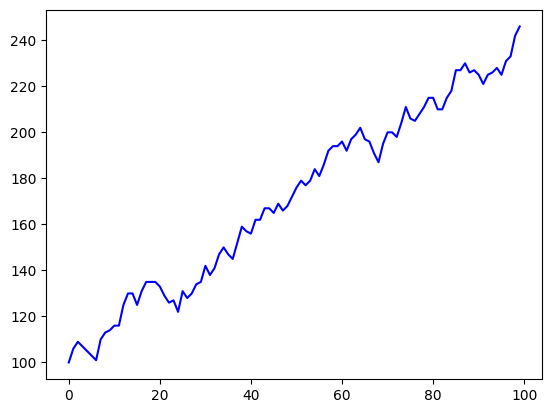

In [1]:
# Stage 1 - modelling a graph that has randomness
# Modelling a simple one-step formula
import numpy as np
import  matplotlib.pyplot as plt

def one_step():
    n = 100
    y = np.zeros(n)
    y[0] = 100
    x = np.arange(n)
    for i in range(1,n):
        y[i] = y[i-1] + np.random.randint(-5,10)
    
    plt.plot(x,y,color="blue")

one_step()
    

We can see here I modelled a simple randomly moving graph to represent the uncertainty potentially faced when monitoring the price movements of a stock. Each time I run the program, the graph will change structure. This highlights some of the intuition behind MC simulation as we plan to simulate this hundreds/thousands of times to determine a more probabilistic, expected outcome. Further in the report I will progress to structures more representative of a stock such as using geometric brownian motion - accounting for a drift and volatility.

## Random Trials

To use Monte Carlo Simulation we must run a number of trials (or paths). To achieve this, we must randomly generate numbers — therefore we use Linear Congruential Generators (LCGs) to create a pseudo-random sequence of numbers. LCGs use a recurrence relation to generate these numbers:

### Linear Congruential Generator

$$
X_{n+1} = (a X_n + c) \bmod m
$$

### Normalised Random Number

$$
U_{n+1} = \frac{X_{n+1}}{m}
$$

We can see that the generator takes the current number (initially the seed), multiplies it by a parameter \(a\), adds an increment \(c\), and then applies the modulus \(m\). The resulting value becomes the next number in the sequence, which is then repeated.

Certain conditions are important for a strong LCG:

1. The multiplier \(a\) should be chosen to ensure a long period for the sequence.
2. The increment \(c\) prevents the generator from being purely multiplicative, which could make it predictable.
3. The modulus \(m\) should be large (preferably prime) to reduce repetition.
4. The initial value \(X_0\) (the seed) allows for reproducibility.

Ideally, the period of the LCG is as large as possible — at most \(m\) — so that the sequence does not repeat too quickly.
e}}{m}
$$


## Geometric Brownian Motion

Geometric Brownian Motion (GBM) is a commonly used method for simulating the price movements of a stock. The stochastic differential equation describing GBM is:

$$
dS(t) = \mu S(t)\, dt + \sigma S(t)\, dW(t)
$$

This equation states that the changes in a stock price are composed of two parts:

1. A deterministic **drift** term, \(\mu S(t)\, dt\), representing the average upward movement of the stock.  
2. A stochastic **diffusion** term, \(\sigma S(t)\, dW(t)\), representing random fluctuations, with severity determined by the volatility \(\sigma\).

In GBM, \(S(t)\) is defined in continuous time, so it cannot be computed directly at discrete intervals. To simulate stock prices numerically, we use the **Euler–Maruyama approximation**, which provides a discrete-time approximation of the continuous stochastic process.
$


## Box Muller Method
So far we have an LCG that will generate uniformly, independent, pseudo-random numbers between 0 and 1. We now need to transform this into a more normally distributed format. This is because the random numbers will represent the shocks in movement, if they are all likely to be picked this will create a flatter shock. This is bad as in the real world large shocks are less common than small movements yet the likelihood of us getting a large shock or a small movement is equally likely from our LCG. So we Apply the Box Muller transform to normalise this and generate a bell curve with a mean of 0 and a standard deviation of $\sqrt{\Delta t}$. 


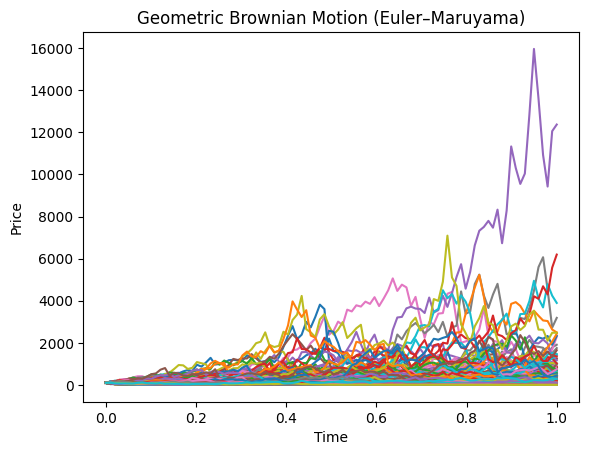

108.96584110018355


In [31]:
# Building an LCG
class LCG:
    def __init__(self,seed, a=16807,c=0,m=2**31 -1):
        self.a = a
        self.c = c
        self.m = m
        self.x = seed
    def next_uniform(self):
        self.x = (self.a * self.x + self.c) % self.m
        return self.x / self.m

# Building the Box Muller Transform
def box_muller(u1, u2):
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z1, z2

# Building our Geometric Brownian Motion using EM Method
def EM(S0,vol,mu,T,dT, seed = 3):
    n = int(T/dT)
    t = np.linspace(0,T,n)
    S = np.zeros(n)
    S[0] = S0
    rng = LCG(seed)
    use_z2 = False
    z2_saved = 0
    for i in range(1,n):
        if use_z2:
            z = z2_saved
            use_z2 = False
        else:
            u1 = rng.next_uniform()
            u2 = rng.next_uniform()
            z1, z2 = box_muller(u1,u2)
            z = z1
            z2_saved = z2
            use_z2 = True

        S[i] = S[i-1] + mu*S[i-1]*dT + vol*S[i-1]*z
    return t, S

import matplotlib.pyplot as plt

final_prices = []
n_paths = 1000
for seed in range(n_paths):
    seed = np.random.randint(0, 2**31 - 1)
    t, S = EM(100, 0.2, 0.05, 1, 0.01,seed=seed)
    plt.plot(t, S)
    final_prices.append(S[-1])

plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Geometric Brownian Motion (Euler–Maruyama)")
plt.show()
expected_value = np.mean(final_prices)
print(expected_value)
    
    

# Conclusion
This project has helped me to understand the importance of Monte Carlo simulation in evaluating outcomes. Beginning with a very basic simulation of price movements in either an upward or downward direction, it was noticeable how much each path changed when the program was run. I then replicated a much more thorough and realistic method to simulate the price movement of a stock. First, we identified the importance of random number generation. While the use of computer random generation has much more applicability in todays world, understanding the idea of pseudo-random numbers and how LCGs came about provided a lot of clarity and insight into how numbers were generated and how they are uniformly and indetically distributed. Next, to adjust to a more real world situation, we transformed our pseudo-random numbers into a normal distribution. This was much more suitable as it allowed for smaller buffers to occur much more commonly and larger disruptions to appear every so often. Finally we wanted to model the price movement of a stock. To achieve this we based our movement off of a Geometric Brownian Motion - the idea that stocks drift upwards with small or large shocks in price along the way. To calculate this we used the Euler-Maruyama method, a numerical approximation that allowed us to simulate the movement of the stock. To perform this, it used the current price of the stock and added a small fraction of the current price on top of it, then applying the volatility multiplied by a randomly generated number to it. 

This project was important in understanding the difficulty of predicting price paths. The more simulations we ran, could allow us to understand how the results converge to a specific number that we would expect to obtain theoretically. The self generation of random numbers provided a good hands-on learning approach, allowing me to understanding the importance and key concepts that go into simulating real world scenarios. From our results, we can see graphically that the majority of paths converge to a certain area and that our expected value gives an output of $108.97 - a much more justified number than just previously runnning one path. 

However, there are limitations to the methods we used. First of all, our method implies that volatility and drift are constantly - this is unlikely to be the case, especially over larger time periods. Whilst LCGs provided a good way to understand concepts, in the real world actual random number generation through more complex methods would be more applicable. Finally, our tests were only ran on one imaginary stock, it is likely that this would have to be done across a portfolio of stocks so our methods could potentially have been more helpful if ran across multiple assets.

Overall, this project demonstrates how stochastic simulations and Monte Carlo methods provide insight into complex, unpredictable systems such as stock prices. By combining random number generation, statistical transforms, and numerical methods, we can model uncertainty and make more informed predictions, even in inherently volatile environments.